# Домашнее задание 4 (большое)

Дедлайн: четверг, 23:59.

## Часть 1: кластеризация (5 баллов)

Скачайте данные (в следующем письме на почте). NB: это совсем не тот датасет из ленты, который мы использовали в семинаре!

In [1]:
import pandas as pd
from __future__ import unicode_literals
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.corpus import stopwords
import re

In [2]:
lenta_df = pd.read_csv('lenta_cropped_2.csv')

In [3]:
len(lenta_df)

42468

In [4]:
lenta_df.head()

,text
0,"Россия, отказавшись от серийного производства ..."
1,Исследователи из Университета штата Иллинойс (...
2,В турецкой больнице скончался 57-летний украин...
3,"Девушку нашли живой через неделю после того, к..."
4,Нескольких пьяных пассажиров сняли с ночного р...


* Постройте две разные модели кластеризации с 4 кластерами (модели должны отличаться только на `random_state`)
* По их меткам (`model.labels_`) найдите `adjusted_rand_score`.
* Постройте другие две модели (с другими параметрами модели или векторизатора, или другим способом векторизации текста способ векторизации).
* Посчитайте `adjusted_rand_score` для них тоже.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

In [6]:
def tokenize(msg):
    msg = re.sub('[!"?/\\()«»—.:;,-]', '', msg).lower()
    msg = [w for w in word_tokenize(msg) if not w in stopset] 
    return msg

In [7]:
stopset = stopwords.words('russian')

In [8]:
bow_tfidf = TfidfVectorizer(tokenizer=tokenize)
bowed_news = bow_tfidf.fit_transform(lenta_df['text'])

In [9]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1, random_state=37)
model.fit(bowed_news)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=37, tol=0.0001, verbose=0)

In [10]:
model2 = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1, random_state=42)
model2.fit(bowed_news)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [11]:
from sklearn.metrics import adjusted_rand_score

In [12]:
# это метки кластеров первой модели
# в том же порядке, в котором тексты в датафрейме
model.labels_
model2.labels_

array([1, 0, 1, ..., 3, 1, 1], dtype=int32)

In [13]:
adjusted_rand_score(model.labels_, model2.labels_)

0.6425444745386302

In [14]:
model3 = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, random_state=33)
model3.fit(bowed_news)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=33, tol=0.0001, verbose=0)

In [15]:
model4 = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, random_state=22)
model4.fit(bowed_news)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=22, tol=0.0001, verbose=0)

In [16]:
adjusted_rand_score(model3.labels_, model4.labels_)

0.9970110218871997

* Для текстов двух кластеров (любой модели) постройте `wordcloud` (для каждого свой). [Туториал по wordcloud](https://www.geeksforgeeks.org/generating-word-cloud-python/).<br>
(`pip3 install wordcloud`)
* Сделайте предположение, какие темы затрагиваются в этих кластерах

In [17]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = bow_tfidf.get_feature_names()
for i in range(4):
        print("Cluster %d:" % i),
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 ученые
 лет
 журнале
 ученых
 исследователи
 университета
 это
 которые
 исследования
 исследование
Cluster 1:
 apple
 игры
 iphone
 компания
 игра
 года
 google
 windows
 xbox
 microsoft
Cluster 2:
 сообщает
 года
 году
 время
 the
 также
 тысяч
 это
 который
 мужчина
Cluster 3:
 россии
 года
 процентов
 году
 рублей
 также
 мкс
 сша
 ракеты
 туристов


Из полученных данных можно сделать вывод, что в первом кластере речь идет о каких-то исследованиях и науке, во втором — об играх на различные платформы, в третьем определить тему оказалось затруднительно, а в четвертом речь идет о военно-воздушных силах, полетах на ракетах и самолетах.

#### Как достать тексты кластера с номером 3:

In [18]:
# обходим все метки кластеров и записываем индексы тех, которые равны 3
third_cluster_indices = [ind for ind, label in enumerate(model.labels_) if label == 3]
third_cluster_indices[:10]

[0, 7, 10, 23, 26, 33, 36, 37, 53, 55]

In [19]:
# достаём соответствующие строки
third_cluster_rows = lenta_df.iloc[third_cluster_indices]
third_cluster_rows.head()

,text
0,"Россия, отказавшись от серийного производства ..."
7,Американский телеканал CNBC со ссылкой на свои...
10,"Американский журнал National Interest заявил, ..."
23,Американские военные 12 июля 2018 года взорвал...
26,«Роскосмос» и предприятия ракетно-космической ...


In [23]:
print(third_cluster_rows.text[0])

Россия, отказавшись от серийного производства Cу-57, фактически признала поражение в возможности создания истребителя пятого поколения, пишет Business Insider. «Россия более или менее признает поражение в создании возможного истребителя пятого поколения», — заявил американскому изданию эксперт в области боевой авиации Королевского Объединенного института оборонных исследований (Великобритания)  Джастин Бронк. Главной причиной отказа от серийного производства перспективного самолета британский эксперт видит в отсутствии финансирования, вызванном, в частности, замораживанием совместной российско-индийской программы по созданию истребителя пятого поколения. Хотя каждый Су-57 стоит 40 миллионов долларов, что в два с лишним раза дешевле американского F-35 Lightning II, такая цена, полагает Бронк, все равно остается высокой по сравнению с другими самолетами, в связи с чем Россия «может просто обвешать свои более старые самолеты большим количеством маскарадных радаров и ракет, поскольку плане

In [24]:
from wordcloud import WordCloud
from matplotlib import pyplot
%matplotlib inline

In [25]:
frst_clstr_inds = [ind for ind, label in enumerate(model.labels_) if label == 1]
frst_clstr_inds[:10]

[170, 227, 274, 290, 313, 330, 406, 577, 677, 689]

In [26]:
frst_clstr_rws = lenta_df.iloc[frst_clstr_inds]

In [27]:
frst = '\n'.join(frst_clstr_rws.text)

In [34]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['на', 'в', 'к', 'и', 'или', 'не', 'об', 'этом', 'это', 'этим', 'как','их', 'ее', 'его',
                            'который', 'также', 'однако', 'но', 'так', 'том', 'что'], 
                min_font_size = 10).generate(frst.lower())

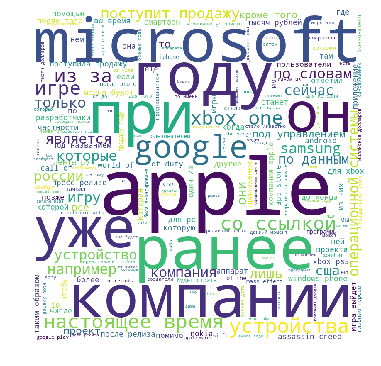

In [35]:
pyplot.figure(figsize = (5, 5), facecolor = None) 
pyplot.imshow(wordcloud) 
pyplot.axis("off") 
pyplot.tight_layout(pad = 0) 
  
pyplot.show() 

В принципе подтверждается тезис о том, что в этом кластере идет речь о различных операционных системах, платформах и играх.

In [37]:
scnd_clstr_inds = [ind for ind, label in enumerate(model.labels_) if label == 2]

In [38]:
scnd_clstr_rws = lenta_df.iloc[scnd_clstr_inds]

In [39]:
scnd = '\n'.join(scnd_clstr_rws.text)

In [44]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['на', 'в', 'к', 'и', 'или', 'не', 'об', 'этом', 'это', 'этим', 'как','их', 'ее', 'его',
                            'который', 'также', 'однако', 'но', 'так', 'том', 'что', 'из', 'за', 'во', 'при', 'которые',
                             'где', 'для', 'когда', 'только', 'после', 'того', 'по', 'он', 'она', 'они', 'уже', 'кроме',
                             'него', 'все', 'то', 'чтобы', 'затем', 'этого', 'будет'], 
                min_font_size = 10).generate(scnd.lower())

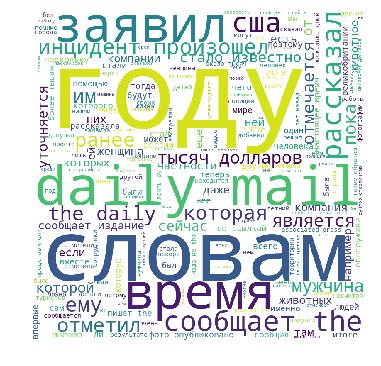

In [45]:
pyplot.figure(figsize = (5, 5), facecolor = None) 
pyplot.imshow(wordcloud) 
pyplot.axis("off") 
pyplot.tight_layout(pad = 0) 
  
pyplot.show()

По этому облаку слов тема стала чуть понятнее — можно сказать, что речь идет о каких-то случаях, связанных с США.

#### Пример облака слов из маленького текста:

In [58]:
from wordcloud import WordCloud
from matplotlib import pyplot
%matplotlib inline

In [92]:
text = 'Котики сидят на заборе и слушают птиц. Котики!'
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['на', 'в', 'к', 'и'], 
                min_font_size = 10).generate(text.lower()) 

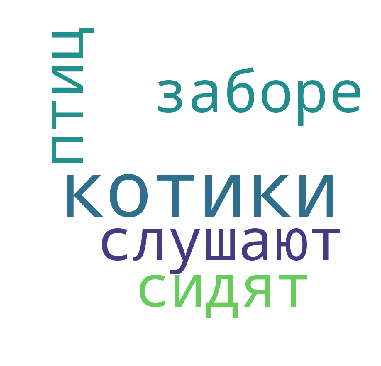

In [93]:
pyplot.figure(figsize = (5, 5), facecolor = None) 
pyplot.imshow(wordcloud) 
pyplot.axis("off") 
pyplot.tight_layout(pad = 0) 
  
pyplot.show() 

А вот что получилось у меня на одном из кластеров ленты:

(честно говоря, нуждается в лучшей чистке от стоп-слов)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = ['на', 'в', 'к', 'и'], 
                min_font_size = 10).generate() 

## Часть 2: парафраз (5 баллов)


### Данные
Загрузите данные из конца семинара `words_and_w2v`:

In [46]:
with open('paraphrases.xml') as f:
    data = f.read()

Как это выглядит:

In [47]:
!tail paraphrases.xml

      <value name="id">25577</value>
      <value name="id_1">34584</value>
      <value name="id_2">34722</value>
      <value name="text_1">9 мая метрополитен Петербурга будет работать круглосуточно</value>
      <value name="text_2">Мартынов: комендантский час в Донецке 9 мая будет отменен</value>
      <value name="jaccard">0.46188021535170065</value>
      <value name="class">-1</value>
    </paraphrase>
  </corpus>
</data>


### Создаём датасет для обучения

In [48]:
from xml.etree import ElementTree

In [49]:
root = ElementTree.XML(data)

In [50]:
par_data = {'text1': [], 'text2': [], 'class': []}
for par in root[1]:
    par_data['text1'].append(par[3].text)
    par_data['text2'].append(par[4].text)
    par_data['class'].append(int(par[6].text))

In [51]:
parphrase_df = pd.DataFrame(par_data)
parphrase_df.head(10)

,text1,text2,class
0,Полицейским разрешат стрелять на поражение по ...,Полиции могут разрешить стрелять по хулиганам ...,0
1,Право полицейских на проникновение в жилище ре...,Правила внесудебного проникновения полицейских...,0
2,Президент Египта ввел чрезвычайное положение в...,Власти Египта угрожают ввести в стране чрезвыч...,0
3,Вернувшихся из Сирии россиян волнует вопрос тр...,Самолеты МЧС вывезут россиян из разрушенной Си...,-1
4,В Москву из Сирии вернулись 2 самолета МЧС с р...,Самолеты МЧС вывезут россиян из разрушенной Си...,0
5,Приставы соберут отпечатки пальцев российских ...,Приставы снимут отпечатки пальцев у злостных н...,1
6,На саратовского дебошира с борта самолета Моск...,Саратовский дебошир отказывается возвращаться ...,-1
7,ЦИК хочет отказаться от электронной системы по...,ЦИК может отказаться от электронных средств по...,0
8,Суд Петербурга оставил на потом дело о гибели ...,Лондонский Гайд-парк - это не место для митинг...,-1
9,Страны ОПЕК сократили добычу нефти на 1 млн ба...,Обама продлил полномочия НАСА по сотрудничеств...,-1


### Задание
* как минимум 4 способами (векторизация + расстояние) посчитайте расстояние между каждой парой предложений (из `text1` и `text2`)
* составьте из этих расстояний признаки для обучения (матрицу признаков, или список списков признаков); должно получиться как-то так (строки -- пары предложений):

```python
array([[0.7, 1.2, 0.1, 1.],
       [0.8, 1.1, 0.3, 1.],
       ...
       [0.9, 1.3, 0.4, 1.]])
```
* на этих признаках обучите любой классификатор на парафраз (предсказывать столбец `class`)

Идеи, как можно получить вектора:
* `CountVectorizer` (и поиграться с аргументами)
* `TfidfVectorizer` (и поиграться с аргументами)
* `CountVectorizer` + `TruncatedSVD` (и поиграться с аргументами, sure)
* ...
* суммировать word2vec для всех слов на эмбеддингах тайги (которые у вас есть)
* суммировать word2vec для всех слов на [других эмбеддингах](http://vectors.nlpl.eu/repository/)

Как можно посчитать расстояние между векторами:
* косинусное расстояние
* евклидово расстояние

Можно добавлять свои способы векторизации / подсчёта расстояния.

In [52]:
from sklearn import decomposition
[item for item in dir(decomposition) if item[0].isupper()] # все классы в модуле decomposition

['DictionaryLearning',
 'FactorAnalysis',
 'FastICA',
 'IncrementalPCA',
 'KernelPCA',
 'LatentDirichletAllocation',
 'MiniBatchDictionaryLearning',
 'MiniBatchSparsePCA',
 'NMF',
 'PCA',
 'RandomizedPCA',
 'SparseCoder',
 'SparsePCA',
 'TruncatedSVD']

In [53]:
from sklearn.metrics.pairwise import distance_metrics
help(distance_metrics)

Help on function distance_metrics in module sklearn.metrics.pairwise:

distance_metrics()
    Valid metrics for pairwise_distances.
    
    This function simply returns the valid pairwise distance metrics.
    It exists to allow for a description of the mapping for
    each of the valid strings.
    
    The valid distance metrics, and the function they map to, are:
    
    ============     ====================================
    metric           Function
    ============     ====================================
    'cityblock'      metrics.pairwise.manhattan_distances
    'cosine'         metrics.pairwise.cosine_distances
    'euclidean'      metrics.pairwise.euclidean_distances
    'l1'             metrics.pairwise.manhattan_distances
    'l2'             metrics.pairwise.euclidean_distances
    'manhattan'      metrics.pairwise.manhattan_distances
    ============     ====================================
    
    Read more in the :ref:`User Guide <metrics>`.



Пример подсчёта евклидова расстояния на документах, векторизованных `CountVectorizer`.

In [54]:
from sklearn.metrics.pairwise import euclidean_distances

In [55]:
vectorizer = CountVectorizer(min_df=3)
vectorizer.fit(parphrase_df.text1 + parphrase_df.text2) # фитим на ВСЕХ данных

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [56]:
print(parphrase_df.text1[0])
print(parphrase_df.text2[0])
print(parphrase_df['class'][0])

Полицейским разрешат стрелять на поражение по гражданам с травматикой.
Полиции могут разрешить стрелять по хулиганам с травматикой.
0


In [57]:
sent1 = vectorizer.transform([parphrase_df.text1[0]])
sent2 = vectorizer.transform([parphrase_df.text2[0]])

In [58]:
sent1 # одна строка (предложение), 5690 столбцов (слов)

<1x5690 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [66]:
euclidean_distances(sent1, sent2)[0][0]

2.6457513110645907

#### Удачного кодинга :)

In [60]:
len(parphrase_df)

7227

In [62]:
eucs = []
for i in range(7227):
    sent1 = vectorizer.transform([parphrase_df.text1[i]])
    sent2 = vectorizer.transform([parphrase_df.text2[i]])
    eucs.append(euclidean_distances(sent1, sent2)[0][0])

In [68]:
def tokenize(msg):
    msg = re.sub('[!"?/\\().:;,-]', '', msg).lower()
    msg = [w for w in word_tokenize(msg) if not w in stopset]
    return msg
tfidf = TfidfVectorizer(tokenizer=tokenize)

In [70]:
from sklearn.metrics.pairwise import manhattan_distances

In [72]:
tfidf.fit(parphrase_df.text1 + parphrase_df.text2)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x1a6738a8c8>, use_idf=True,
        vocabulary=None)

In [73]:
man = []
for i in range(7227):
    sent1 = tfidf.transform([parphrase_df.text1[i]])
    sent2 = tfidf.transform([parphrase_df.text2[i]])
    man.append(manhattan_distances(sent1, sent2)[0][0])

In [75]:
from sklearn.metrics.pairwise import cosine_distances

In [76]:
cos = []
for i in range(7227):
    sent1 = vectorizer.transform([parphrase_df.text1[i]])
    sent2 = vectorizer.transform([parphrase_df.text2[i]])
    cos.append(cosine_distances(sent1, sent2)[0][0])

In [77]:
eucs2 = []
for i in range(7227):
    sent1 = tfidf.transform([parphrase_df.text1[i]])
    sent2 = tfidf.transform([parphrase_df.text2[i]])
    eucs2.append(euclidean_distances(sent1, sent2)[0][0])

In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [80]:
classifier = MultinomialNB()

In [140]:
X_train, X_test, y_train, y_test = train_test_split(newz, parphrase_df['class'])

In [141]:
clf = classifier.fit(X_train, y_train)

In [139]:
zipped = zip(eucs, man, cos, eucs2)
newz = list(zipped)

In [142]:
from sklearn.metrics import classification_report

In [143]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

         -1       1.00      0.00      0.01       647
          0       0.42      1.00      0.59       751
          1       0.00      0.00      0.00       409

avg / total       0.53      0.42      0.25      1807



/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
lr = LogisticRegression(random_state=42)
clf = lr.fit(X_train, y_train)

In [146]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

         -1       0.64      0.74      0.68       647
          0       0.52      0.61      0.56       751
          1       0.55      0.23      0.33       409

avg / total       0.57      0.57      0.55      1807

